## Spectrum of the Instantanous Hamiltonian

Imports

In [7]:
from src.qutip_lab.qutip_class import SpinOperator, SpinHamiltonian, SteadyStateSolver
from tqdm import trange 
import numpy as np
import matplotlib.pyplot as plt
import qutip

Data

In [8]:
data = np.load(
    "data/dataset_h_eff/periodic/dataset_periodic_random_rate_03-1_random_amplitude_01-08_fixed_initial_state_nbatch_1_batchsize_200000_steps_400_tf_40.0_l_8_240513.npz"
)

data = np.load(
    "data/dataset_h_eff/periodic/dataset_periodic_uniform_random_rate_03-1_random_amplitude_01-08_fixed_initial_state_nbatch_1_batchsize_20000_steps_400_tf_40.0_l_8_240601.npz"
)

h_data=data['h']
h_eff_data=data['h_eff']

Span of the fields

In [32]:
idx = np.random.randint(0, h_data.shape[0])

linear_grid = 100
n_levels=4
l=h_data.shape[-1]
h=h_data[idx,::h_data.shape[-2]//linear_grid]
h_eff = h_eff_data[idx]
time=np.linspace(0,40,linear_grid)
time_extended = np.linspace(0, 40, h_data.shape[-2])
print(h.shape)

(100, 8)


In [34]:
spectrum=np.zeros((h.shape[0],n_levels))
z_crossings = np.zeros((h.shape[0], 6))
for i in trange(linear_grid):
    ham0 = SpinHamiltonian(
        direction_couplings=[("x", "x")],
        pbc=True,
        coupling_values=[-1.0],
        size=l,
    )

    hamExtZ = SpinOperator(
        index=[("z", i) for i in range(l)], coupling=h[i], size=l
    )

    eng_sp, psi_sp = np.linalg.eigh(hamExtZ.qutip_op + ham0.qutip_op)
    psis=[]
    for i in range(n_levels):
        psis.append( qutip.Qobj(psi_sp[:, i], shape=psi_sp[:,i].shape, dims=([[2 for i in range(l)], [1]])))

    z_ops = SpinOperator(index=[("z", i) for i in range(l)], coupling=[1/l]*l, size=l)
    
    count=0
    for r in range(n_levels):
        for l in range(i,n_levels):
            z_crossings[i,count]=np.conj(psi_sp[:,r]) @ z_ops.qutip_op @ psi_sp[:,l]
            count+=1 

    spectrum[i]=eng_sp[:n_levels]

  0%|          | 0/100 [00:00<?, ?it/s]


AttributeError: 'SpinOperator' object has no attribute '_qutip_op'

Check the magnetization

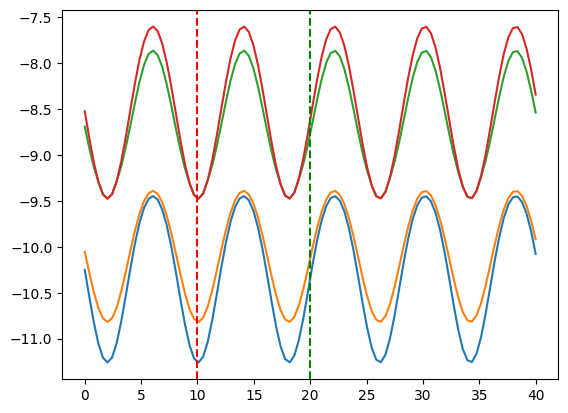

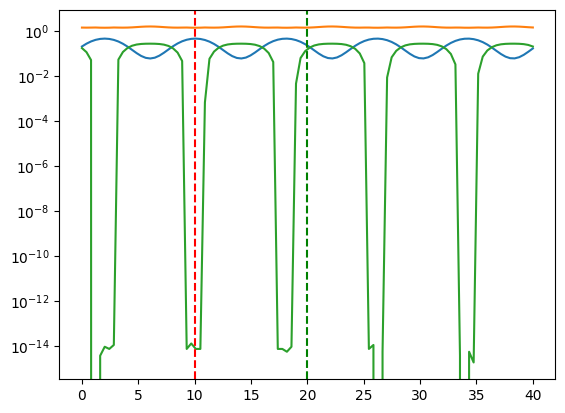

In [31]:
for i in range(n_levels):
    plt.plot(time,spectrum[:,i])
plt.axvline(x=10,color='red',linestyle='--')
plt.axvline(x=20, color="green",linestyle='--')

plt.show()


for i in range(n_levels-1):
    plt.plot(time, np.abs(spectrum[:, i+1]-spectrum[:,i]))
plt.semilogy()
plt.axvline(x=10, color="red", linestyle="--")
plt.axvline(x=20, color="green", linestyle="--")

plt.show()

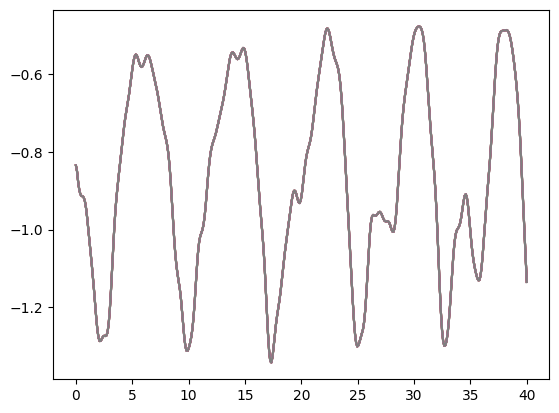

In [30]:
for i in range(l):
    plt.plot(time_extended,h_eff[:,i])
plt.show()

Plot of the Spectrum

[-8. -8. -4.]


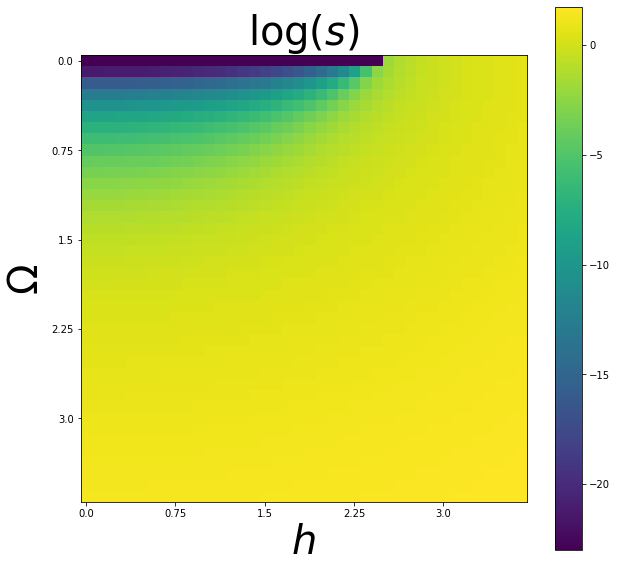

In [29]:
fig=plt.figure(figsize=(10,10))
plt.title(r'$\log(s)$',fontsize=40)
print(spectrum[:,0,0])
plt.imshow(np.log(np.abs(spectrum[1]-spectrum[0] +10**-10)))
xticks_label=np.linspace(0,3,5)
yticks_label=np.linspace(0,3,5)
plt.xticks(np.arange(0,linear_grid,linear_grid//5),xticks_label)
plt.xlabel(r'$h$',fontsize=40)
plt.ylabel(r'$\Omega$',fontsize=40)
plt.yticks(np.arange(0,linear_grid,linear_grid//5),yticks_label)
plt.colorbar()
plt.show()
